#**Partial Dependence Plot**

The code generates a Partial Dependence Plot (PDP) for the 'mean radius' feature within the Breast Cancer dataset using a RandomForestClassifier. Here's a breakdown of its components and purpose:
- Import Libraries: Necessary Python libraries and specific functions are imported for handling data (pandas, numpy), creating plots (matplotlib), working with the Breast Cancer dataset (sklearn.datasets), modeling data with a random forest classifier (sklearn.ensemble), generating partial dependence plots (sklearn.inspection), and splitting data (sklearn.model_selection).

- Load the Breast Cancer Dataset: The dataset is loaded from scikit-learn's dataset collection. It's a widely used dataset for classification tasks, containing features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Each feature represents characteristics of the cell nuclei present in the image.

- Data Preparation: The dataset is divided into features (X) and target labels (y). It's then split into training and testing sets to prepare for model training and evaluation.

- Model Training: A RandomForestClassifier is trained on the dataset. Random forests are an ensemble learning method that operates by constructing multiple decision trees during training time and outputting the class that is the mode of the classes (classification) of the individual trees.

- Partial Dependence Plot Generation: Using the PartialDependenceDisplay.from_estimator method, a PDP is created for the 'mean radius' feature. This plot shows how the prediction of the model is influenced by the 'mean radius' feature values, while averaging out the effects of all other features. The purpose of a PDP is to visualize the effect of a single feature on the predicted outcome, which is particularly useful for understanding the behavior of complex models like random forests.

- Visualization: The plot is displayed with a title and adjusted spacing to make sure it's clear and informative.



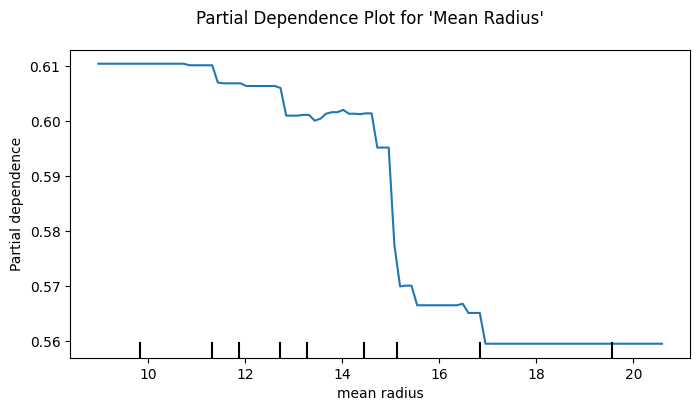

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Find the index of the 'mean radius' feature
feature_names = data.feature_names
feature_idx = np.where(feature_names == 'mean radius')[0][0]

# Generate the partial dependence plot using the new API
fig, ax = plt.subplots(figsize=(8, 4))
PartialDependenceDisplay.from_estimator(clf, X_test, features=[feature_idx],
                                        feature_names=data.feature_names, ax=ax)
plt.suptitle("Partial Dependence Plot for 'Mean Radius'")
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

